## Summary

Welcome to the NASA Earthdata Cloud Clinic. 

We will go through **two different direct cloud access & subsetting options available in the Earthdata Cloud:** 

1. **The [earthaccess](https://github.com/nsidc/earthaccess) python library** for data search and direct cloud access, followed by `xarray` subsetting 
    * Working with [MEaSUREs Sea Surface Height Anomalies](https://podaac.jpl.nasa.gov/dataset/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205)
    * Discover data using [Earthdata Search](https://search.earthdata.nasa.gov/search/granules?p=C2270392799-POCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=measures%20ssh%20anomalies&tl=1685392107!3!!)
2. **The [Harmony-py](https://github.com/nasa/harmony-py) python library** for direct cloud access & data subsetting
    * Requesting a subset of data from the [GHRSST Level 4 MUR Global Foundation Sea Surface Temperature Analysis (v4.1)](https://podaac.jpl.nasa.gov/dataset/MUR-JPL-L4-GLOB-v4.1) dataset using a vector-based geospatial file.
    * This dataset can also be viewed in [Earthdata Search](https://search.earthdata.nasa.gov/search?q=GHRSST%20Level%204%20MUR%20v4.1&ff=Available%20in%20Earthdata%20Cloud!Customizable). 
    
In both scenarios, we will be accessing data directly from Amazon Web Services (AWS), specifically in the us-west-2 region, which is where all cloud-hosted NASA Earthdata reside. This shared compute environment (JupyterHub) is also running in the same location. We will then load the data into Python as an `xarray` `dataset`.

See the bottom of the notebook for additional resources, including several tutorials that that served as a foundation for this clinic. 

### A note on subsetting

In addition to directly accessing the files archived and distributed by each of the NASA DAACs, many datasets also support services that allow us to customize the data via subsetting, reformatting, reprojection/regridding, and file aggregation. What does subsetting mean? Here's a generalized graphic of what we mean. 

![](images/subsetting_diagram.png){fig-alt="Three maps of the United States are present, with a red bounding box over the state of Colorado. Filtering and subsetting are demonstrated by overlaying SMAP L2 data, with data overlapping and cropping the rectangle, respectively."  width=60%}

Note: "direct cloud access" is also called "direct S3 access" or simply "direct access". And "subsetting" is also called "transformation".

## Learning Objectives

1. Utilize the `earthaccess` python library to search for data using spatial and temporal filters and explore search results
2. Perform in-region direct access of data from an Amazon Simple Storage Service (S3) bucket
3. Extract variables and spatial slices from an `xarray` dataset 
4. Plot data using `xarray` 
5. Conceptualize data subsetting services provided by NASA Earthdata, including Harmony
6. Plot a polygon geojson file with a basemap using `geoviews` 
7. Utilize the `harmony-py` library to request data over the Gulf of Mexico

***

## Prerequisites

First we'll import python packages and set our authentication that will be used for both of our access and subsetting methods.


You'll also need to be aware that data in NASA's Earthdata Cloud reside in Amazon Web Services (AWS) Simple Storage Service (S3) buckets. Access is provided via temporary credentials; this access is limited to requests made within the US West (Oregon) (code: us-west-2) AWS region. While this compute location is required for direct S3 access, all data in Earthdata Cloud are still freely available via download.  

### Import Required Packages

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
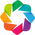

In [2]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# Direct access
import earthaccess 
from pprint import pprint
import xarray as xr

# Harmony
import geopandas as gpd
import geoviews as gv
gv.extension('bokeh', 'matplotlib')
from harmony import BBox, Client, Collection, Request, LinkType
import datetime as dt
import s3fs
%matplotlib inline

### About `earthaccess`  

`earthaccess` leverages the [Common Metadata Repository (CMR) API](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html) to search for collections and granules.  

1. Authentication

2. Search

Transition from search results to `xarray`

### Authentication for NASA Earthdata 

An Earthdata Login account is required to access data from NASA Earthdata. Please visit <https://urs.earthdata.nasa.gov> to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

The first step is to get the correct authentication that will allow us to get cloud-hosted data from NASA. This is all done through Earthdata Login. We can use the `earthaccess` library here, where the `login` method also gets the correct AWS credentials.

In [3]:
auth = earthaccess.login(strategy='netrc')

You're now authenticated with NASA Earthdata Login
Using token with expiration date: 11/27/2023
Using .netrc file for EDL


In [ ]:
auth = earthaccess.login(strategy = 'interactive', 
                         persist = True)

### Search for data

Earthdata Search also uses the CMR API. Let's head back to our [Earthdata Search](https://search.earthdata.nasa.gov/search/granules?p=C2270392799-POCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=measures%20ssh%20anomalies&tl=1685392107!3!!) results to gather more information about our dataset of interest. The dataset "short name" can be found by clicking on the Info button on our collection search result, and we can paste that into a python variable.

| Shortname | Collection Concept ID | DOI |
| --- | --- | --- |
| GPM_3IMERGDF | C2723754864-GES_DISC | 10.5067/GPM/IMERGDF/DAY/07 |
| MOD10C1 | C1646609808-NSIDC_ECS | 10.5067/MODIS/MOD10C1.061 |
| SPL4SMGP | C2531308461-NSIDC_ECS | 10.5067/EVKPQZ4AFC4D | 
| SPL4SMAU | C2537927247-NSIDC_ECS | 10.5067/LWJ6TF5SZRG3 |

#### Search by collection

In [4]:
short_name = 'GPM_3IMERGDF'
col_id = 'C2723754864-GES_DISC'

In [6]:
results = earthaccess.search_data(
    concept_id = col_id,
    cloud_hosted = True,
    count = 10    # Restricting to 10 records returned
)

Granules found: 8400


In this example we used the `concept_id` parameter to search from our desired collection. However, there are multiple ways to specify the collection(s) we are interested in. Alternative parameters include:  

- `doi` - request collection by digital object indentifier (e.g., `doi` = '10.5067/GPM/IMERGDF/DAY/07')  
- `short_name` - request collection by CMR shortname (e.g., `short_name` = 'GPM_3IMERGDF')  

We can refine our search by passing more parameters that describe the spatiotemporal domain of our use case. Here, we use the `temporal` parameter to request a date range.

In [7]:
date_range = ("2022-11-19", "2023-04-06")
bbox = (-127.0761, 31.6444, -113.9039, 42.6310)

In [8]:
results = earthaccess.search_data(
    concept_id = col_id,
    cloud_hosted = True,
    temporal = date_range,
    bounding_box = bbox,
)

Granules found: 139


We can use the `bounding_box` parameter to further refine our request to return data assets that intersect with our desired bounding box.

In [9]:
bbox = (-127.0761, 31.6444, -113.9039, 42.6310)

In [10]:
results = earthaccess.search_data(
    concept_id = col_id,
    cloud_hosted = True,
    temporal = date_range,
    bounding_box = bbox,
)

Granules found: 139


- The `short_name` and `concept_id` search parameters can be used to request one or multiple collections per request, but the `doi` parameter can only request a single collection.  
> `concept_id` = ['C2723754864-GES_DISC', 'C1646609808-NSIDC_ECS']  
- CMR concept IDs and collection DOIs are unique to each version of a data collection. However CMR shortnames are not. CMR shortnames can be associated with multiple versions of a collection, so it is recommended to use the `short_name` parameter and the `version` parameter in conjuction.  
- Use the `cloud_hosted` search parameter only to search for data assets available from NASA's Earthdata Cloud.
- 

### Explore `earthaccess` search response

In [12]:
print(f'The results variable is a {type(results)} of {type(results[0])}')

The results variable is a <class 'list'> of <class 'earthaccess.results.DataGranule'>


In [13]:
o = results[0]

In [16]:
o.get_s3_credentials_endpoint()

'https://data.gesdisc.earthdata.nasa.gov/s3credentials'

In [19]:
o.

['https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGDF.07/2022/11/3B-DAY.MS.MRG.3IMERG.20221119-S000000-E235959.V07.nc4']

In [ ]:
pprint(results[0])

In [23]:
search_params = {
    "concept_id": "C2408009906-LPCLOUD", # CMR concept ID for EMITL1BRAD.001
    #"day_night_flag": "day",
    "cloud_cover": (0, 10),
    "temporal": ("2022-05", "2023-08"),
    "bounding_box": (-99.65, 18.85, -98.5, 19.95)
}
results = earthaccess.search_data(**search_params)

Granules found: 2


In [24]:
d = results[0]
d.data_links()

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230216T212513_2304714_028/EMIT_L1B_RAD_001_20230216T212513_2304714_028.nc',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230216T212513_2304714_028/EMIT_L1B_OBS_001_20230216T212513_2304714_028.nc']

In [25]:
[x.data_links() for x in results]

[['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230216T212513_2304714_028/EMIT_L1B_RAD_001_20230216T212513_2304714_028.nc',
  'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230216T212513_2304714_028/EMIT_L1B_OBS_001_20230216T212513_2304714_028.nc'],
 ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230224T181429_2305512_036/EMIT_L1B_RAD_001_20230224T181429_2305512_036.nc',
  'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL1BRAD.001/EMIT_L1B_RAD_001_20230224T181429_2305512_036/EMIT_L1B_OBS_001_20230224T181429_2305512_036.nc']]

263

### Access data

Our code will work the same way if we are running it "in-region", within our shared cloud environment, or locally from our laptop.

Since we are working in the AWS `us-west-2` region, we can stream data directly to xarray. We are using the `open_mfdataset()` (multi-file) method, which is required when using `earthaccess`.

In [ ]:
ds = xr.open_mfdataset(earthaccess.open(results))
ds

### Subset data 
We can create a subsetted xarray dataset by extracting the SLA variable and slicing the dataset by a smaller area of interest near the state of Baja, Mexico. 

In [ ]:
ds_subset = ds['SLA'].sel(Latitude=slice(15.8, 35.9), Longitude=slice(234.5,260.5)) 
ds_subset

Use the built-in plotting function of xarray to create a plot of SLA standard deviation over time: 

In [ ]:
ds_subset.std('Time').plot(figsize=(10,6), x='Longitude', y='Latitude');

---

## 2. [`harmony-py`](https://github.com/nasa/harmony-py) + [`xarray`](https://docs.xarray.dev/en/stable/) 

We will be accessing a subsetted NetCDF-4 file using Transformation Services in the Cloud. 

Using [Earthdata Search](https://search.earthdata.nasa.gov/search?q=GHRSST%20Level%204%20MUR%20v4.1&ff=Available%20in%20Earthdata%20Cloud!Customizable), we can find datasets that support these services using the "Customizable" filter. 

We will find, request, and open customized data using [Harmony](https://harmony.earthdata.nasa.gov/), below.

### Define area of interest

First, use `geopandas` to read in a geojson file containing a polygon feature over the Gulf of Mexico. The geojson file is found in the ~/data directory. 

In [ ]:
geojson_path = './data/gulf.json'
gdf = gpd.read_file(geojson_path) #Return a GeoDataFrame object

We can plot the polygon using the `geoviews` package that we imported as gv with ‘bokeh’ and ‘matplotlib’ extensions. The following has reasonable width, height, color, and line widths to view our polygon when it is overlayed on a base tile map. We can view this with the `*` operator.

In [ ]:
base = gv.tile_sources.EsriImagery.opts(width=650, height=500)
ocean_map = gv.Polygons(gdf).opts(line_color='yellow', line_width=5, color=None)
base * ocean_map

### Create a subset request

Here we'll create a request for a spatial subset of data.

First, we need to create a Harmony Client, which is what we will interact with to submit and inspect a data request to Harmony, as well as to retrieve results.

When creating the Client, we need to provide Earthdata Login credentials. This basic line below assumes that we have a `.netrc` available. See the Earthdata Cloud Cookbook [appendix](https://nasa-openscapes.github.io/earthdata-cloud-cookbook/appendix/authentication.html) for more information on [Earthdata Login](https://urs.earthdata.nasa.gov/) and netrc setup. 

In [ ]:
harmony_client = Client()

See the [harmony-py documentation](https://harmony-py.readthedocs.io/en/latest/) for details on how to construct your request.

In [ ]:
sst_short_name="MUR-JPL-L4-GLOB-v4.1"

request = Request(
    collection=Collection(id=sst_short_name),
    shape=geojson_path,
    temporal={
    'start': dt.datetime(2021, 8, 1, 1),
    'stop': dt.datetime(2021, 8, 1, 2)   
    },
)

### Submit a subset request

Now that the request is created, we can now submit it to Harmony using the Harmony Client object. A job id is returned, which is a unique identifier that represents the submitted request.

In [ ]:
job_id = harmony_client.submit(request)
job_id

### Check request status

Depending on the size of the request, it may be helpful to wait until the request has completed processing before the remainder of the code is executed. The wait_for_processing() method will block subsequent lines of code while optionally showing a progress bar.

In [ ]:
harmony_client.wait_for_processing(job_id, show_progress=True)

We can view Harmony job response and output URLs
Once the data request has finished processing, we can view details on the job that was submitted to Harmony, including the API call to Harmony, and informational messages on the request if available.

`result_json()` calls `wait_for_processing()` and returns the complete job in JSON format once processing is complete. 

In [ ]:
data = harmony_client.result_json(job_id)
pprint(data)

### Access data

Just like above, the subsetted outputs produced by Harmony can be accessed directly from the cloud. 

First, we'll retrieve list of output URLs.

The `result_urls()` method calls `wait_for_processing()` and returns a list of the processed data URLs once processing is complete. You may optionally show the progress bar as shown below.

In [ ]:
results = harmony_client.result_urls(job_id, link_type=LinkType.s3)
urls = list(results)
url = urls[0]
print(url)

Using `aws_credentials` you can retrieve the credentials needed to access the Harmony s3 staging bucket and its contents.

In [ ]:
creds = harmony_client.aws_credentials()

### Open staged files with *s3fs* and *xarray*

We use the AWS `s3fs` package to create a file system that can then be read by xarray:

In [ ]:
s3_fs = s3fs.S3FileSystem(
    key=creds['aws_access_key_id'],
    secret=creds['aws_secret_access_key'],
    token=creds['aws_session_token'],
    client_kwargs={'region_name':'us-west-2'},
)

Now that we have our s3 file system set, including our declared credentials, we'll use that to open the url, and read in the file through xarray. This extra step is needed because xarray cannot open the S3 location directly. Instead, the S3 file object is passed to xarray, in order to then open the dataset. 

In [ ]:
f = s3_fs.open(url, mode='rb')
ds = xr.open_dataset(f)
ds

As before, we use the xarray built in plotting function to create a simple plot along the x and y dimensions of the dataset. We can see that the data are subsetted to our polygon:

In [ ]:
ds.analysed_sst.plot();

## Additional Resources

### Tutorials

This clinic was based off of several notebook tutorials including those presented during [past workshop events](https://nasa-openscapes.github.io/earthdata-cloud-cookbook/tutorials/), along with other materials co-created by the NASA Openscapes mentors:
* [2021 Earthdata Cloud Hackathon](https://nasa-openscapes.github.io/2021-Cloud-Hackathon/)
* [2021 AGU Workshop](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/)
* [Accessing and working with ICESat-2 data in the cloud](https://github.com/nsidc/NSIDC-Data-Tutorials/tree/main/notebooks/ICESat-2_Cloud_Access)
* [Analyzing Sea Level Rise Using Earth Data in the Cloud](https://github.com/betolink/earthaccess-gallery/blob/main/notebooks/Sea_Level_Rise/SSL.ipynb)

### Cloud services

The examples used in the clinic provide an abbreviated and simplified workflow to explore access and subsetting options available through the Earthdata Cloud. There are several other options that can be used to interact with data in the Earthdata Cloud including: 

* [OPeNDAP](https://opendap.earthdata.nasa.gov/) 
    * Hyrax provides direct access to subsetting of NASA data using Python or your favorite analysis tool
    * Tutorial highlighting OPeNDAP usage: https://nasa-openscapes.github.io/earthdata-cloud-cookbook/how-tos/working-locally/Earthdata_Cloud__Data_Access_OPeNDAP_Example.html
* [Zarr-EOSDIS-Store](https://github.com/nasa/zarr-eosdis-store)
    * The zarr-eosdis-store library allows NASA EOSDIS Collections to be accessed efficiently by the Zarr Python library, provided they have a sidecar DMR++ metadata file generated. 
    * Tutorial highlighting this library's usage: https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/09_Zarr_Access.html 

### Support

* [Earthdata Forum](https://forum.earthdata.nasa.gov/)
    * User Services and community support for all things NASA Earthdata, including Earthdata Cloud
* [Earthdata Webinar series](https://www.earthdata.nasa.gov/learn/webinars-and-tutorials)
    * Webinars from DAACs and other groups across EOSDIS including guidance on working with Earthdata Cloud
    * See the [Earthdata YouTube channel](https://www.youtube.com/@NASAEarthdata/featured) for more videos 